Citation: https://www.tensorflow.org/lite/models/modify/model_maker/image_classification

In [2]:
!pip install -U tflite-model-maker keras
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
100% 532M/534M [00:30<00:00, 18.7MB/s]
100% 534M/534M [00:30<00:00, 18.3MB/s]


In [44]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [4]:
!unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [45]:
from pathlib import Path

dataset = Path("/content/Vegetable Images/")
train_data = DataLoader.from_folder(dataset / "train")
test_data = DataLoader.from_folder(dataset / "test")
val_data = DataLoader.from_folder(dataset / "validation")
print(train_data.size, train_data.num_classes, train_data.index_to_label)

INFO:tensorflow:Load image with size: 15000, num_label: 15, labels: Bean, Bitter_Gourd, Bottle_Gourd, Brinjal, Broccoli, Cabbage, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato.


INFO:tensorflow:Load image with size: 15000, num_label: 15, labels: Bean, Bitter_Gourd, Bottle_Gourd, Brinjal, Broccoli, Cabbage, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato.


INFO:tensorflow:Load image with size: 3000, num_label: 15, labels: Bean, Bitter_Gourd, Bottle_Gourd, Brinjal, Broccoli, Cabbage, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato.


INFO:tensorflow:Load image with size: 3000, num_label: 15, labels: Bean, Bitter_Gourd, Bottle_Gourd, Brinjal, Broccoli, Cabbage, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato.


INFO:tensorflow:Load image with size: 3000, num_label: 15, labels: Bean, Bitter_Gourd, Bottle_Gourd, Brinjal, Broccoli, Cabbage, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato.


INFO:tensorflow:Load image with size: 3000, num_label: 15, labels: Bean, Bitter_Gourd, Bottle_Gourd, Brinjal, Broccoli, Cabbage, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato.


15000 15 ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [ ]:
model = image_classifier.create(train_data, validation_data=val_data)

In [7]:
loss, accuracy = model.evaluate(test_data)

94/94 [==============================] - 7s 70ms/step - loss: 0.6105 - accuracy: 0.9980


In [8]:
print(model, dir(model), type(model), model.model, sep="\n")
model.export(export_dir='.')

['ALLOWED_EXPORT_FORMAT', 'DEFAULT_EXPORT_FORMAT', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_export_labels', '_export_saved_model', '_export_tfjs', '_export_tflite', '_get_default_export_format', '_get_export_format', '_get_hparams_or_default', '_get_tflite_input_tensors', '_hparams', '_keras_callbacks', 'create', 'create_model', 'create_serving_model', 'evaluate', 'evaluate_tflite', 'export', 'history', 'index_to_label', 'model', 'model_spec', 'num_classes', 'predict_top_k', 'preprocess', 'representative_data', 'shuffle', 'summary', 'train', 'train_whole_model']
<class 'tensorflow_examples.lite.model_maker.core.task.image_classifier.Image

/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [11]:
!rm -rf /content/model
model.model.save('./model')

In [12]:
!zip -r /content/model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 91%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model/variables/variables.index (deflated 79%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/keras_metadata.pb (deflated 81%)


In [ ]:
print(model.model.get_config())

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 224, 224, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}}, {'class_name': 'HubKerasLayerV1V2', 'config': {'name': 'hub_keras_layer_v1v2', 'trainable': False, 'dtype': 'float32', 'handle': 'https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2', 'signature': 'default', 'output_key': 'default'}}, {'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 15, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0, 'l2': 9.999999747378752e-05}}, 'bias_regularizer': None, 'acti

In [ ]:
a=test_data.gen_dataset()

In [ ]:
b = iter(a)

In [ ]:
c = next(b)

In [ ]:
!pip install opencv_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(c)

(<tf.Tensor: shape=(1, 224, 224, 3), dtype=uint8, numpy=
array([[[[233, 241, 252],
         [233, 241, 252],
         [232, 240, 251],
         ...,
         [222, 224, 236],
         [221, 223, 235],
         [220, 222, 234]],

        [[233, 241, 252],
         [233, 241, 252],
         [232, 240, 251],
         ...,
         [221, 223, 235],
         [220, 222, 234],
         [219, 221, 233]],

        [[232, 242, 252],
         [231, 241, 251],
         [231, 241, 251],
         ...,
         [220, 222, 234],
         [219, 221, 233],
         [218, 220, 232]],

        ...,

        [[ 61,  74,  44],
         [ 39,  52,  22],
         [ 31,  44,  16],
         ...,
         [213, 224, 244],
         [214, 225, 245],
         [214, 225, 245]],

        [[ 76,  87,  57],
         [ 50,  61,  31],
         [ 35,  46,  16],
         ...,
         [214, 225, 245],
         [214, 225, 245],
         [214, 225, 245]],

        [[ 93, 104,  74],
         [ 54,  65,  35],
         [ 31,  4

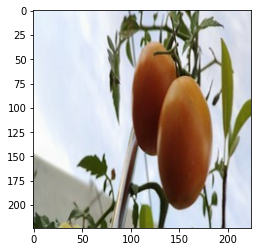

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(c[0][0])

In [ ]:
b = model.predict_top_k([c[0]], k = 15)

In [ ]:
print(b)

[[('Tomato', 0.52964616), ('Bean', 0.15824056), ('Potato', 0.14948249), ('Radish', 0.03889551), ('Cauliflower', 0.020932447), ('Bitter_Gourd', 0.019172663), ('Papaya', 0.014473779), ('Broccoli', 0.011141487), ('Pumpkin', 0.010736632), ('Cabbage', 0.010568251), ('Carrot', 0.010200682), ('Capsicum', 0.008223827), ('Bottle_Gourd', 0.008123375), ('Brinjal', 0.0066902484), ('Cucumber', 0.0034718446)]]


In [13]:
import cv2

In [14]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2


In [51]:
import tensorflow as tf
loaded = tf.keras.models.load_model('/content/model')
# _imc_model = model
model = loaded

In [53]:
print(model)
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_unique_metric_name',
 '_add_variable_with_custom_getter',
 '_assert_built_as_v1',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_build_model_with_inputs',
 '_cache_output_metric_attributes',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_

In [54]:
model.weights

[<tf.Variable 'efficientnet-lite0/stem/conv2d/kernel_3:0' shape=(3, 3, 3, 32) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/stem/tpu_batch_normalization/gamma_3:0' shape=(32,) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/stem/tpu_batch_normalization/beta_3:0' shape=(32,) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/blocks_0/depthwise_conv2d/depthwise_kernel_3:0' shape=(3, 3, 32, 1) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/blocks_0/tpu_batch_normalization/gamma_3:0' shape=(32,) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/blocks_0/tpu_batch_normalization/beta_3:0' shape=(32,) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/blocks_0/conv2d/kernel_3:0' shape=(1, 1, 32, 16) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/blocks_0/tpu_batch_normalization_1/gamma_3:0' shape=(16,) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/blocks_0/tpu_batch_normalization_1/beta_3:0' shape=(16,) dtype=float32>,
 <tf.Variable 'efficientnet-lite0/blocks_1/conv2d/kernel_3:0

In [27]:
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

In [28]:
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

In [30]:
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

------------------------------------------------------------
Frozen model layers: 
x
sequential/hub_keras_layer_v1v2/119864
Func/sequential/hub_keras_layer_v1v2/StatefulPartitionedCall/input/_26
sequential/hub_keras_layer_v1v2/119870
Func/sequential/hub_keras_layer_v1v2/StatefulPartitionedCall/input/_29
sequential/hub_keras_layer_v1v2/119886
Func/sequential/hub_keras_layer_v1v2/StatefulPartitionedCall/input/_37
sequential/hub_keras_layer_v1v2/119904
Func/sequential/hub_keras_layer_v1v2/StatefulPartitionedCall/input/_46
sequential/hub_keras_layer_v1v2/119912
Func/sequential/hub_keras_layer_v1v2/StatefulPartitionedCall/input/_50
sequential/hub_keras_layer_v1v2/119928
Func/sequential/hub_keras_layer_v1v2/StatefulPartitionedCall/input/_58
sequential/hub_keras_layer_v1v2/119942
Func/sequential/hub_keras_layer_v1v2/StatefulPartitionedCall/input/_65
sequential/hub_keras_layer_v1v2/119954
Func/sequential/hub_keras_layer_v1v2/StatefulPartitionedCall/input/_71
sequential/hub_keras_layer_v1v2/120

In [31]:
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir="/content/frozen",
                  name=f"veg_frozen.pb",
                  as_text=False)

tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir="/content/frozen",
                  name=f"veg_frozen.pbxt",
                  as_text=True)

'/content/frozen/veg_frozen.pbxt'

In [33]:
!zip -r /content/frozen.zip /content/frozen

  adding: content/frozen/ (stored 0%)
  adding: content/frozen/veg_frozen.pbxt (deflated 56%)
  adding: content/frozen/veg_frozen.pb (deflated 10%)


In [36]:
!python3 -m pip install conda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 299 kB 32.0 MB/s 
     |████████████████████████████████| 66 kB 6.5 MB/s 
     |████████████████████████████████| 109 kB 64.1 MB/s 
     |████████████████████████████████| 555 kB 62.1 MB/s 
  Created wheel for conda: filename=conda-4.3.16-py3-none-any.whl size=336959 sha256=a4a75fa3f8316c0638d58cbbf142fbb8c759e8aa4d6e6fd40c5d5b874aa3c96f
  Stored in directory: /root/.cache/pip/wheels/6e/c5/70/e50a1a99d26cbe940549549b7601d484e0f0bc4b8f0ec49e36
  Created wheel for pycosat: filename=pycosat-0.6.3-cp38-cp38-linux_x86_64.whl size=143274 sha256=ebbc37b3066b70a44959868d7c80e61c6a592dcd9978063baa40620cee3ddf23
  Stored in directory: /root/.cache/pip/wheels/71/5b/2d/0a9247760f0f008abc0eae7c0127a8c1cddfe1145e4b170fc0
Successfully built conda pycosat


In [43]:
!python3 -m pip install virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 9.3 MB/s 
     |████████████████████████████████| 468 kB 61.1 MB/s 


In [46]:
!virtualenv tf15

created virtual environment CPython3.8.16.final.0-64 in 835ms
  creator CPython3Posix(dest=/content/tf15, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.3.1, setuptools==65.6.3, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [49]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [7]:
!conda create -n tf15 python=3.6
!conda run -n tf15 conda install tensorflow=1.5.0

Solving environment: \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/tf15

  added / updated specs:
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2016.9.26          |           py36_0         217 KB  conda-forge
    openssl-1.1.1s             |       h0b41bf4_1         1.9 MB  conda-forge
    pip-20.0.2                 |           py36_1         1.9 MB  conda-forge
    python-3.6.15              |hb7a2778_0_cpython        38.4 MB  conda-forge
    python_abi-3.6             |          2_cp36m           4 KB  conda-forge
    setuptools-49.6.0          |   py36h5fab9bb_3         936 KB  conda-forge
    wheel-0.34.2               |           py36_0      

In [9]:
!conda run -n tf15 python -m tensorflow.python.tools.optimize_for_inference --input /content/frozen/veg_frozen.pb --output /content/frozen/veg_fro_opt.pb --frozen_graph=True --input_names=x --output_names=Identity

/usr/local/envs/tf15/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/envs/tf15/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/envs/tf15/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/envs/tf15/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:4

In [13]:
import tensorflow as tf

In [18]:
optimized_graph_path = "/content/frozen/veg_fro_opt.pb"
output_pbtxt = "/content/frozen/veg_fro_opt.pbtxt"# Read the graph.
with tf.io.gfile.GFile(optimized_graph_path, "rb") as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())

# Remove Const nodes.

for i in reversed(range(len(graph_def.node))):
    if graph_def.node[i].op == 'Const':
        del graph_def.node[i]
    for attr in ['T', 'data_format', 'Tshape', 'N', 'Tidx', 'Tdim',
                 'use_cudnn_on_gpu', 'Index', 'Tperm', 'is_training',
                 'Tpaddings']:
        if attr in graph_def.node[i].attr:
            del graph_def.node[i].attr[attr]
# Save as text.
tf.io.write_graph(graph_def, "", output_pbtxt, as_text=True)

'/content/frozen/veg_fro_opt.pbtxt'

In [19]:
!zip -r /content/frozen_opt.zip /content/frozen

  adding: content/frozen/ (stored 0%)
  adding: content/frozen/veg_frozen.pbxt (deflated 56%)
  adding: content/frozen/veg_frozen.pb (deflated 10%)
  adding: content/frozen/veg_fro_opt.pb (deflated 9%)
  adding: content/frozen/veg_fro_opt.pbtxt (deflated 97%)


In [20]:
import cv2

In [30]:
dn = cv2.dnn.readNetFromTensorflow("/content/frozen/veg_fro_opt.pb", "/content/frozen/veg_fro_opt.pbtxt")

error: ignored

In [35]:
!python3 -m pip install tf2onnx tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [36]:
!python -m tf2onnx.convert --saved-model "/content/model" --output "model.onnx" --opset 11

2022-12-31 11:08:47.541876: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/local/lib:/usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-31 11:08:47.542064: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/local/lib:/usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-31 11:08:47.542088: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with Tensor

In [37]:
dn = cv2.dnn.readNet("/content/model.onnx")

error: ignored